In [1]:
from os import listdir
from os.path import isfile, join

mypath = './example_Kr_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [2]:
total_text =''
for doc in total_docs:
    total_text = total_text+' '+doc

In [3]:
from kornounextractor.noun_extractor import extract
with open('dic.txt', 'w', encoding='utf8') as f:
    for word in sorted(extract(total_text, freq=1.0)):
        f.write(word+'\tNNG\n')

In [4]:
import konlpy.tag
komoran = konlpy.tag.Komoran(userdic='dic.txt')

In [5]:
stopwords = ['하며','동아일보','경향신문','조선일보','단독', '핫한', '한겨레', '재테크','재배포','동아닷컴','우리','사진','진행','.co','.kr','나가기','페이스북','.com','오전','18일', '19일', '이날','이번', '있다','홈페이지', '기자', '무단전재', '무단', '보기경향신문', '클릭', '하기', '금지', '기자', '뉴스', '기사', 'AP통신', 'Copyrights', 'SNS', 'chosuncom', 'dongacom', 'hyopdhanicokr', 'tbs', 'wwwkhancokr']

In [6]:
def remove_words(words):
    new_words=[word for word in words if len(word)>1 and word not in stopwords]
    return new_words

In [7]:
docs_nouns = [remove_words(komoran.nouns(doc.replace('\n',' '))) for doc in total_docs]

In [8]:
len(docs_nouns)

13

In [9]:
print(docs_nouns[0])

['김학범', '감독', '자카르타', '팔렘방', '아시안게임', '남자', '축구', '대표팀', '이하', '한국시간', '인도네시아', '브카시', '패트리어트', '찬드라바', '스타디움', '우즈베키스탄', '대회', '전서', '황의조', '맹활약', '연장', '접전', '-3', '승리', '김학범호', '1월', 'AFC', '챔피언십', '강서', '우즈벡', '-4', '패배', '진출', '한국', '베트남', '시리아전', '승자', '결승행', '김학범', '감독', '전력', '가동', '-3', '-3', '이란', '전과', '비교', '선발', '라인업', '변화', '손흥민', '황의조', '낙점', '반면', '상호', '베로나', '대신', '선발', '출격', '황인범', '아산', '장윤호', '전북', '이승모', '광주', '중원', '구축', '포백', '라인', '왼쪽', '김진야', '인천', '황현수', '서울', '김민재', '전북', '김문환', '부산', '골키퍼', '장갑', '부상자', '조현우', '대구', '대신', '송범근', '경기', '시작', '동시', '한국', '전반', '손흥민', '돌파', '이후', '감각', '패스', '황의조', '황의조', '슈팅', '골문', '선제골', '한국', '손흥민', '중심', '역습', '우즈벡', '수비', '라인', '이용', '측면', '마무리', '실패', '전반', '장윤호', '부상', '그라운드', '교체', '분위기', '우즈벡', '전열', '정비', '반격', '전반', '한국', '박스', '이승모', '황현수', '수비', '안일', '리어', '미스', '측면', '크로스', '허용', '마샤리포프', '동점골', '한편', '장윤호', '경기장', '복귀', '벤치', '사인', '이진현', '교체', '경기장', '이후', '우즈벡', '한국', '선수', '체력', '문제', '우즈벡', '주포', '중심', '한국

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [10]:
documents_filtered = []
for doc in docs_nouns:
    document_filtered =''
    for word in doc:
        document_filtered = document_filtered+' '+word
    documents_filtered.append(document_filtered)

In [11]:
documents_filtered[0]

' 김학범 감독 자카르타 팔렘방 아시안게임 남자 축구 대표팀 이하 한국시간 인도네시아 브카시 패트리어트 찬드라바 스타디움 우즈베키스탄 대회 전서 황의조 맹활약 연장 접전 -3 승리 김학범호 1월 AFC 챔피언십 강서 우즈벡 -4 패배 진출 한국 베트남 시리아전 승자 결승행 김학범 감독 전력 가동 -3 -3 이란 전과 비교 선발 라인업 변화 손흥민 황의조 낙점 반면 상호 베로나 대신 선발 출격 황인범 아산 장윤호 전북 이승모 광주 중원 구축 포백 라인 왼쪽 김진야 인천 황현수 서울 김민재 전북 김문환 부산 골키퍼 장갑 부상자 조현우 대구 대신 송범근 경기 시작 동시 한국 전반 손흥민 돌파 이후 감각 패스 황의조 황의조 슈팅 골문 선제골 한국 손흥민 중심 역습 우즈벡 수비 라인 이용 측면 마무리 실패 전반 장윤호 부상 그라운드 교체 분위기 우즈벡 전열 정비 반격 전반 한국 박스 이승모 황현수 수비 안일 리어 미스 측면 크로스 허용 마샤리포프 동점골 한편 장윤호 경기장 복귀 벤치 사인 이진현 교체 경기장 이후 우즈벡 한국 선수 체력 문제 우즈벡 주포 중심 한국 한국 이상 추가 실점 위기 순간 분위기 히어로 황의조 전반 황인범 패스 황의조 중거리 슈팅 우즈벡 골문 황의조 득점 이후 한국 공세 황의조 전반 개인 기로 상대 수비진 무너트리 득점 기회 우즈벡 골키퍼 필사 수비 무산 전반 우즈벡 페널티박스 프리킥 기회 슈팅 골문 전반 막바지 시간 한국 반대 페널티박스 프리킥 찬스 손흥민 키커 상대 선방 무산 전반 한국 -1 마무리 후반 시작 동시 한국 상호 대신 황희찬 투입 변화 후반 3분 에프 페널티박스 위력 오른발 슈팅 송범근 자신감 송범근 후반 상대 슛터링 안정 모습 송범근 차례 선방 결국 후반 페널티박스 골대 아래 오른발 슈팅 동점골 동점골 이후 한국 전열 정비 후반 이승모 중원 위기 허용 알리 슈팅 황현수 리드 김학범 감독 후반 이승모 대신 이승우 투입 변화 이승우 투입 공격 후반 이승우 페널티박스 개인 이후 슈팅 골문 시간 황의조 한국 후반 우즈벡 수비 실수 손흥

In [13]:
vectorizer, DTM_tfidf = tfidf_extractor(documents_filtered)

In [14]:
import numpy as np

In [22]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
cluster_idf = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=4).fit(DTM_np)

In [18]:
cluster_idf.labels_

array([1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0], dtype=int64)

In [19]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity # cosine similarity 계산하기
import itertools

In [20]:
DOCS_NUM = len(docs_nouns)

In [21]:
DOCS_NUM 

13

In [25]:
clusters = []
g = nx.Graph()
g.add_nodes_from(list(range(DOCS_NUM)))
for pair in list(itertools.combinations(range(DOCS_NUM), 2)):
    similarity = cosine_similarity(DTM_TFIDF[pair[0]].reshape(1,-1), DTM_TFIDF[pair[1]].reshape(1,-1))[0][0]

    if similarity>0.15: # 문서간의 유사도 기준을 0.35로 한 경우
        g.add_edge(pair[0], pair[1], weight=similarity)

C:\Users\Sang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


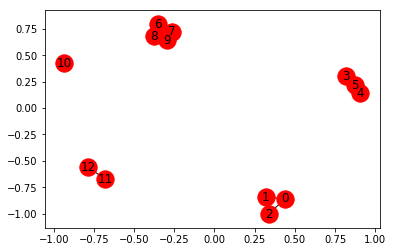

In [26]:
import matplotlib.pyplot as plt
nx.draw_networkx(g)
plt.show()